In [24]:
import pandas as pd
import numpy as np
import scipy as sp

In [25]:
df_cata=pd.read_csv('clustered/catalogue7.csv')
df_imm=pd.read_csv('Données_communes/Immatriculations.csv', encoding = 'ISO-8859-1')
df_imm.head()

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,3176 TS 67,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300
1,3721 QS 49,Volvo,S80 T6,272,très longue,5,5,noir,False,50500
2,9099 UV 26,Volkswagen,Golf 2.0 FSI,150,moyenne,5,5,gris,True,16029
3,3563 LA 55,Peugeot,1007 1.4,75,courte,5,5,blanc,True,9625
4,6963 AX 34,Audi,A2 1.4,75,courte,5,5,gris,False,18310


In [26]:
df3=pd.merge(df_imm,df_cata, left_on=['marque','nom','puissance','longueur','nbPlaces','nbPortes','couleur','occasion','prix'], right_on=['marque','nom','puissance','longueur','nbPlaces','nbPortes','couleur','occasion','prix'], how='left')
df3

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
0,3176 TS 67,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300,99,Berline
1,3721 QS 49,Volvo,S80 T6,272,très longue,5,5,noir,False,50500,1,Sportive
2,9099 UV 26,Volkswagen,Golf 2.0 FSI,150,moyenne,5,5,gris,True,16029,41,Hatchback
3,3563 LA 55,Peugeot,1007 1.4,75,courte,5,5,blanc,True,9625,113,Citadine
4,6963 AX 34,Audi,A2 1.4,75,courte,5,5,gris,False,18310,262,Citadine
...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,771 CQ 78,Mercedes,S500,306,très longue,5,5,gris,True,70910,150,Sportive
1999996,8182 PL 97,Lancia,Ypsilon 1.4 16V,90,courte,5,3,blanc,True,9450,173,Micro
1999997,8550 AP 53,Ford,Mondeo 1.8,125,longue,5,5,rouge,False,23900,209,Berline
1999998,737 MK 20,Audi,A2 1.4,75,courte,5,5,bleu,True,12817,263,Citadine


In [27]:
client1=pd.read_csv("Données_groupe/Groupe_TPT_1/Clients_11.csv", encoding = 'ISO-8859-1')
client2=pd.read_csv("Données_groupe/Groupe_TPT_1/Clients_12.csv", encoding = 'ISO-8859-1')
client=pd.concat([client1,client2]).reset_index(drop=True)
client



,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation
0,44,M,476,En Couple,0,false,3176 TS 67
1,20,M,422,En Couple,2,false,3721 QS 49
2,49,F,221,Célibataire,0,false,9099 UV 26
3,57,M,246,Célibataire,0,false,3563 LA 55
4,58,M,1149,Célibataire,0,false,6963 AX 34
...,...,...,...,...,...,...,...
199995,40,Féminin,1000,Célibataire,0,false,8108 RO 11
199996,21,Femme,235,Célibataire,0,false,7268 LO 18
199997,64,M,179,En Couple,0,false,9059 XM 27
199998,71,M,836,Célibataire,0,false,9945 TN 57


In [28]:
client.isnull().sum()

age                   0
sexe                  0
taux                  0
situationFamiliale    0
nbEnfantsAcharge      0
2eme voiture          0
immatriculation       0
dtype: int64

In [29]:
final=pd.merge(client,df3, left_on=['immatriculation'], right_on=['immatriculation'], how='left')
final.drop(['marque','nom','puissance','longueur','nbPlaces','nbPortes','couleur','occasion','prix'], inplace=True, axis=1)
final

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie
0,44,M,476,En Couple,0,false,3176 TS 67,99,Berline
1,20,M,422,En Couple,2,false,3721 QS 49,1,Sportive
2,49,F,221,Célibataire,0,false,9099 UV 26,41,Hatchback
3,57,M,246,Célibataire,0,false,3563 LA 55,113,Citadine
4,58,M,1149,Célibataire,0,false,6963 AX 34,262,Citadine
...,...,...,...,...,...,...,...,...,...
200665,40,Féminin,1000,Célibataire,0,false,8108 RO 11,266,Citadine
200666,21,Femme,235,Célibataire,0,false,7268 LO 18,118,Citadine
200667,64,M,179,En Couple,0,false,9059 XM 27,4,Sportive
200668,71,M,836,Célibataire,0,false,9945 TN 57,156,Hatchback


In [30]:
duplicate = final[final.duplicated('immatriculation')]
duplicate=list(final.immatriculation.values)
duplicate

['3176 TS 67',
 '3721 QS 49',
 '9099 UV 26',
 '3563 LA 55',
 '6963 AX 34',
 '5592 HQ 89',
 '674 CE 26',
 '1756 PR 31',
 '6705 GX 50',
 '4487 DR 75',
 '4487 DR 75',
 '7080 NW 34',
 '9626 HF 36',
 '2401 PA 98',
 '826 YF 89',
 '8216 GR 23',
 '8076 YM 23',
 '9277 JN 49',
 '4231 HC 31',
 '2319 IQ 28',
 '148 RS 75',
 '6786 JV 36',
 '8049 KN 17',
 '9610 BR 52',
 '8745 KJ 12',
 '5805 YN 37',
 '7341 QB 17',
 '9925 TY 41',
 '6238 TQ 16',
 '4395 AS 40',
 '1295 WZ 85',
 '3228 PI 22',
 '3367 NG 10',
 '5784 HC 14',
 '6685 TE 75',
 '6461 RY 26',
 '1498 MN 80',
 '4400 IT 29',
 '9066 UX 89',
 '9075 QO 83',
 '826 NJ 62',
 '1791 WG 33',
 '715 BO 44',
 '3484 AH 69',
 '9629 ZS 93',
 '5620 EV 51',
 '8548 AJ 17',
 '1891 YV 82',
 '6262 AO 31',
 '9721 LN 29',
 '8379 YQ 86',
 '2021 AV 73',
 '699 OU 38',
 '2267 LU 10',
 '2083 WU 93',
 '7871 FA 27',
 '4800 WC 72',
 '9016 HT 57',
 '6241 OH 14',
 '637 YM 58',
 '8728 LC 19',
 '7786 DF 35',
 '6745 IT 89',
 '6828 XD 36',
 '4794 CW 30',
 '3808 SY 57',
 '5169 SB 91',
 '

In [31]:
boolean = final['immatriculation'].value_counts()
a=list(boolean[boolean.values>0].index)

In [32]:
boolean = final['immatriculation'].value_counts()
a=list(boolean[boolean.values>0].index)
count=0
for i in a:
    print(i)
    if count<10:
        display(df3[df3['immatriculation']==i])
    else:
        break    
    count=count+1

3491 UO 84


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
78929,3491 UO 84,BMW,M5,507,très longue,5,5,bleu,False,94800,236,Sportive
85012,3491 UO 84,BMW,M5,507,très longue,5,5,blanc,False,94800,232,Sportive


9921 SH 10


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
2302,9921 SH 10,Nissan,Maxima 3.0 V6,200,très longue,5,5,gris,False,30000,126,Sportive
830298,9921 SH 10,Jaguar,X-Type 2.5 V6,197,longue,5,5,gris,False,37100,180,Berline


4495 KK 61


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
850475,4495 KK 61,Volkswagen,Polo 1.2 6V,55,courte,5,3,blanc,False,12200,21,Micro
858531,4495 KK 61,Renault,Megane 2.0 16V,135,moyenne,5,5,gris,False,22350,85,Hatchback


93 NM 49


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
60859,93 NM 49,Renault,Megane 2.0 16V,135,moyenne,5,5,gris,False,22350,85,Hatchback
809232,93 NM 49,Saab,9.3 1.8T,150,longue,5,5,bleu,False,38600,66,Berline


1498 GR 61


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
850784,1498 GR 61,Jaguar,X-Type 2.5 V6,197,longue,5,5,rouge,False,37100,183,Berline
875392,1498 GR 61,Seat,Toledo 1.6,102,longue,5,5,blanc,False,18880,55,Berline


9387 QD 31


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
15570,9387 QD 31,Audi,A2 1.4,75,courte,5,5,noir,True,12817,260,Citadine
61984,9387 QD 31,Renault,Vel Satis 3.5 V6,245,très longue,5,5,gris,False,49200,75,Sportive


8775 VR 37


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
849889,8775 VR 37,Volvo,S80 T6,272,très longue,5,5,gris,False,50500,5,Sportive
878681,8775 VR 37,Jaguar,X-Type 2.5 V6,197,longue,5,5,bleu,False,37100,189,Berline


2761 VB 93


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
18499,2761 VB 93,Mercedes,S500,306,très longue,5,5,rouge,True,70910,147,Sportive
806875,2761 VB 93,Peugeot,1007 1.4,75,courte,5,5,gris,False,13750,112,Citadine


7814 WC 93


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
62448,7814 WC 93,Audi,A2 1.4,75,courte,5,5,noir,True,12817,260,Citadine
872792,7814 WC 93,Audi,A2 1.4,75,courte,5,5,noir,False,18310,265,Citadine


3171 HR 29


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
824309,3171 HR 29,Fiat,Croma 2.2,147,longue,5,5,noir,False,24780,218,Berline
861413,3171 HR 29,Volvo,S80 T6,272,très longue,5,5,blanc,False,50500,0,Sportive


1769 OU 76


In [33]:
final

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie
0,44,M,476,En Couple,0,false,3176 TS 67,99,Berline
1,20,M,422,En Couple,2,false,3721 QS 49,1,Sportive
2,49,F,221,Célibataire,0,false,9099 UV 26,41,Hatchback
3,57,M,246,Célibataire,0,false,3563 LA 55,113,Citadine
4,58,M,1149,Célibataire,0,false,6963 AX 34,262,Citadine
...,...,...,...,...,...,...,...,...,...
200665,40,Féminin,1000,Célibataire,0,false,8108 RO 11,266,Citadine
200666,21,Femme,235,Célibataire,0,false,7268 LO 18,118,Citadine
200667,64,M,179,En Couple,0,false,9059 XM 27,4,Sportive
200668,71,M,836,Célibataire,0,false,9945 TN 57,156,Hatchback


In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import warnings
warnings.filterwarnings('ignore')
import matplotlib
plt.style.use('ggplot')
import re

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,3)

In [35]:
final.shape

(200670, 9)

In [36]:
final.isnull().sum()

age                   0
sexe                  0
taux                  0
situationFamiliale    0
nbEnfantsAcharge      0
2eme voiture          0
immatriculation       0
Unnamed: 0            0
categorie             0
dtype: int64

In [37]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200670 entries, 0 to 200669
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 200670 non-null  object
 1   sexe                200670 non-null  object
 2   taux                200670 non-null  object
 3   situationFamiliale  200670 non-null  object
 4   nbEnfantsAcharge    200670 non-null  object
 5   2eme voiture        200670 non-null  object
 6   immatriculation     200670 non-null  object
 7   Unnamed: 0          200670 non-null  int64 
 8   categorie           200670 non-null  object
dtypes: int64(1), object(8)
memory usage: 15.3+ MB


### 1 Data Cleaning

On va commencer par enlever les lignes contenant [' ','?','N/D'] dans les columns categorielles 'Sexe','situationFamiliale' et '2eme voiture' vu qu'il est difficile de les remplacer avec une autre valeur (prediction) et qu'ils vont servir d'un point de commencement pour le nettoyage des données pour les autres colonnes

In [38]:
final.sexe.value_counts(normalize=True)

M           0.684233
F           0.292869
Masculin    0.007176
Homme       0.006932
Femme       0.003144
Féminin     0.002746
            0.001042
?           0.000987
N/D         0.000872
Name: sexe, dtype: float64

In [39]:
null_values_sexe=['N/D',' ','?']
final=final.loc[~final.sexe.isin(null_values_sexe)]
final.sexe.value_counts(normalize=True)

M           0.686223
F           0.293721
Masculin    0.007197
Homme       0.006952
Femme       0.003154
Féminin     0.002754
Name: sexe, dtype: float64

In [40]:
final['sexe']=final['sexe'].replace(to_replace=["Masculin", "Homme"],value="M")
final['sexe']=final['sexe'].replace(to_replace=["Femme", "Féminin"],value="F")
final.sexe.value_counts(normalize=True)

M    0.700372
F    0.299628
Name: sexe, dtype: float64

In [41]:
final.situationFamiliale.value_counts(normalize=True)

En Couple      0.640048
Célibataire    0.298114
Seule          0.048893
Marié(e)       0.006357
Seul           0.002899
?              0.001100
N/D            0.001045
               0.000980
Divorcée       0.000565
Name: situationFamiliale, dtype: float64

In [42]:
null_values_sexe=['N/D',' ','?']
final=final.loc[~final.situationFamiliale.isin(null_values_sexe)]
final.situationFamiliale.value_counts(normalize=True)

En Couple      0.642054
Célibataire    0.299048
Seule          0.049047
Marié(e)       0.006377
Seul           0.002908
Divorcée       0.000567
Name: situationFamiliale, dtype: float64

In [43]:
final['situationFamiliale']=final['situationFamiliale'].replace(to_replace=["Célibataire", "Seule","Seul","Divorcée"],value="Célibataire")
final['situationFamiliale']=final['situationFamiliale'].replace(to_replace=["En Couple", "Marié(e)"],value="En Couple")
final.situationFamiliale.value_counts(normalize=True)

En Couple      0.648431
Célibataire    0.351569
Name: situationFamiliale, dtype: float64

In [44]:
final=final.loc[~final['2eme voiture'].isin(null_values_sexe)]
final['2eme voiture'].value_counts(normalize=True)

false    0.86992
true     0.13008
Name: 2eme voiture, dtype: float64

Maintenant on va imputer les valeurs manquantes de nbEnfantsAcharge avec la valeur la plus fréquente par un groupby de situationFamiliale et sexe.
La valeur trouvé dans notre cas est 0.

In [45]:
final.groupby(['situationFamiliale','sexe']).\
    agg(nbr_enfant=('nbEnfantsAcharge',lambda x: sp.stats.mode(x)[0]))

nbr_enfant
situationFamiliale sexe           
Célibataire        F             0
                   M             0
En Couple          F             0
                   M             1

In [46]:
final.nbEnfantsAcharge.value_counts()

0     89545
1     32914
2     32578
3     23428
4     19999
-1      200
        189
?       186
Name: nbEnfantsAcharge, dtype: int64

In [47]:
final.loc[(final["nbEnfantsAcharge"].isin(null_values_sexe))&(final['situationFamiliale']=='Célibataire'),'nbEnfantsAcharge']='0'
final.loc[(final["nbEnfantsAcharge"].isin(null_values_sexe))&(final['situationFamiliale']=='En Couple'),'nbEnfantsAcharge']='1'
final.loc[final["nbEnfantsAcharge"]=='-1','nbEnfantsAcharge']='0'

On a créer ici un data frame de passage pour rendre les variable age en float afin de réaliser la moyenne de l'age selon situationFamiliale et nbEnfantsAcharge pour remplacer les variables manquantes.
Les variables on été compris entre un intervalle faible[42.9-43.9] donc on a pris la valeur 43 comme valeur

In [48]:
final_temp=final[~final.isin(['?',' ','N/D']).any(axis=1)]
final_temp

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie
0,44,M,476,En Couple,0,false,3176 TS 67,99,Berline
1,20,M,422,En Couple,2,false,3721 QS 49,1,Sportive
2,49,F,221,Célibataire,0,false,9099 UV 26,41,Hatchback
3,57,M,246,Célibataire,0,false,3563 LA 55,113,Citadine
4,58,M,1149,Célibataire,0,false,6963 AX 34,262,Citadine
...,...,...,...,...,...,...,...,...,...
200665,40,F,1000,Célibataire,0,false,8108 RO 11,266,Citadine
200666,21,F,235,Célibataire,0,false,7268 LO 18,118,Citadine
200667,64,M,179,En Couple,0,false,9059 XM 27,4,Sportive
200668,71,M,836,Célibataire,0,false,9945 TN 57,156,Hatchback


In [49]:
final_temp['age'] = final_temp['age'].astype(float)

In [50]:
final_temp.groupby(['situationFamiliale','nbEnfantsAcharge']).\
    agg(moyen_age=('age',lambda x: np.mean(x)))

moyen_age
situationFamiliale nbEnfantsAcharge           
Célibataire        0                 43.571903
                   1                 43.605525
                   2                 42.964955
                   3                 43.434384
En Couple          0                 43.757995
                   1                 43.767095
                   2                 43.926668
                   3                 43.458738
                   4                 43.608377

In [51]:
final.loc[final["age"].isin(null_values_sexe),'age']='43'
final.loc[final["age"]=='-1','age']='43'


In [52]:
final[final.age.isin(null_values_sexe)]

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie


On va terminer avec l'autre variable numérique qui est Taux ou on va aussi passer par un dataframe de passage afin d'avoir la moyenne du taux selon nbEnfantsAcharge et situationFamiliale pour remplacer les valeurs manquantes.

la valeur prise est 605 (les moyennes étaient proche donc il n'y a des énormes valeurs abérantes)

In [53]:
final_temp=final[~final.isin(['?',' ','N/D']).any(axis=1)]
final_temp[['age','taux','nbEnfantsAcharge']] = final_temp[['age','taux','nbEnfantsAcharge']].astype(int)
final_temp

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie
0,44,M,476,En Couple,0,false,3176 TS 67,99,Berline
1,20,M,422,En Couple,2,false,3721 QS 49,1,Sportive
2,49,F,221,Célibataire,0,false,9099 UV 26,41,Hatchback
3,57,M,246,Célibataire,0,false,3563 LA 55,113,Citadine
4,58,M,1149,Célibataire,0,false,6963 AX 34,262,Citadine
...,...,...,...,...,...,...,...,...,...
200665,40,F,1000,Célibataire,0,false,8108 RO 11,266,Citadine
200666,21,F,235,Célibataire,0,false,7268 LO 18,118,Citadine
200667,64,M,179,En Couple,0,false,9059 XM 27,4,Sportive
200668,71,M,836,Célibataire,0,false,9945 TN 57,156,Hatchback


In [54]:
final_temp.groupby(['situationFamiliale','nbEnfantsAcharge']).\
    agg(taux_moyen=('taux',lambda x: np.mean(x)))

taux_moyen
situationFamiliale nbEnfantsAcharge            
Célibataire        0                 609.417754
                   1                 594.345201
                   2                 604.567722
                   3                 604.459146
En Couple          0                 606.354035
                   1                 607.597758
                   2                 609.147553
                   3                 605.057457
                   4                 609.579638

In [55]:
final.loc[final["taux"].isin(null_values_sexe),'taux']='605'
final.loc[final["taux"]=='-1','taux']='605'


In [56]:
final[['age','taux','nbEnfantsAcharge']] = final[['age','taux','nbEnfantsAcharge']].astype(int)

In [57]:
final[final.isin(['?',' ','N/D']).any(axis=1)]

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie


In [58]:
final

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie
0,44,M,476,En Couple,0,false,3176 TS 67,99,Berline
1,20,M,422,En Couple,2,false,3721 QS 49,1,Sportive
2,49,F,221,Célibataire,0,false,9099 UV 26,41,Hatchback
3,57,M,246,Célibataire,0,false,3563 LA 55,113,Citadine
4,58,M,1149,Célibataire,0,false,6963 AX 34,262,Citadine
...,...,...,...,...,...,...,...,...,...
200665,40,F,1000,Célibataire,0,false,8108 RO 11,266,Citadine
200666,21,F,235,Célibataire,0,false,7268 LO 18,118,Citadine
200667,64,M,179,En Couple,0,false,9059 XM 27,4,Sportive
200668,71,M,836,Célibataire,0,false,9945 TN 57,156,Hatchback


### 2 Data Visualisation

In [59]:
final.describe()

,age,taux,nbEnfantsAcharge,Unnamed: 0
count,199039.000000,199039.000000,199039.000000,199039.000000
mean,43.703500,608.423073,1.249032,153.805104
std,18.194297,334.562970,1.388626,84.520496
min,18.000000,150.000000,0.000000,0.000000
25%,28.000000,421.000000,0.000000,77.000000
50%,42.000000,522.000000,1.000000,165.000000
75%,56.000000,824.000000,2.000000,233.000000
max,84.000000,1399.000000,4.000000,269.000000


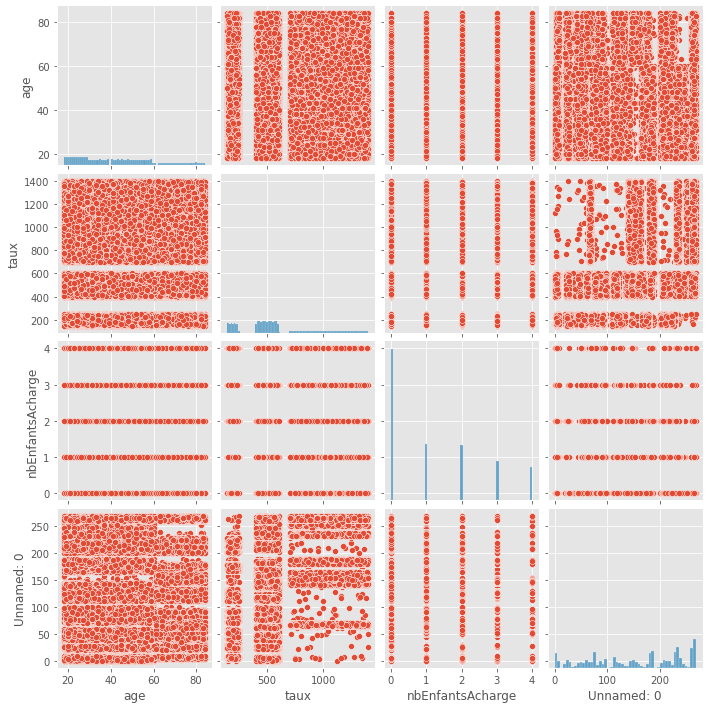

In [60]:
sns.pairplot(final)
plt.show()

<AxesSubplot:xlabel='categorie', ylabel='taux'>

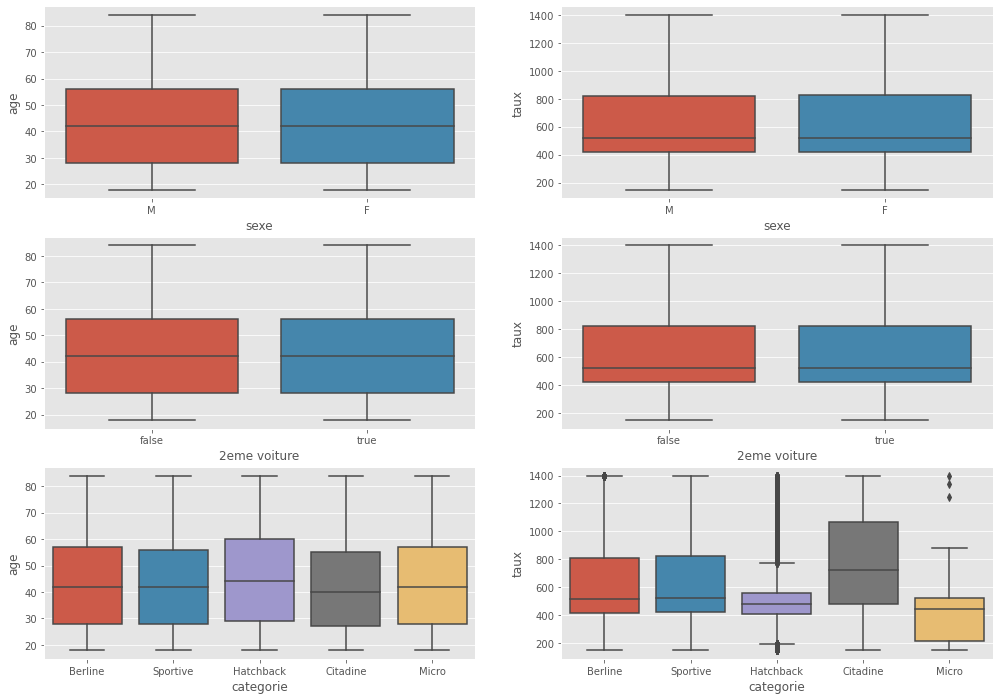

In [61]:
matplotlib.rcParams['figure.figsize'] = (17,12)
_, axs = plt.subplots(ncols = 2, nrows = 3)
sns.boxplot(x = final.sexe, y = final.age, ax=axs[0,0])
sns.boxplot(x = final.sexe, y = final.taux, ax=axs[0,1])
sns.boxplot(x = final['2eme voiture'], y = final.age, ax=axs[1,0])
sns.boxplot(x = final['2eme voiture'], y = final.taux, ax=axs[1,1])
sns.boxplot(x = final.categorie, y = final.age, ax=axs[2,0])
sns.boxplot(x = final.categorie, y = final.taux, ax=axs[2,1])

In [62]:
display(final[(final.taux>800)&(final.categorie=='Hatchback')].shape[0],final[final.categorie=='Hatchback'].shape[0])

1812

21564

Les box plots ne montrent pas de valeurs abérante sauf pour le cas du dernier plot qui présente quelque valeur abérante pour la catégorie micro au dessus du max et beaucoup de valeurs abérante pour la catégorie 'Hatchback' par rapport à la variable 'taux'

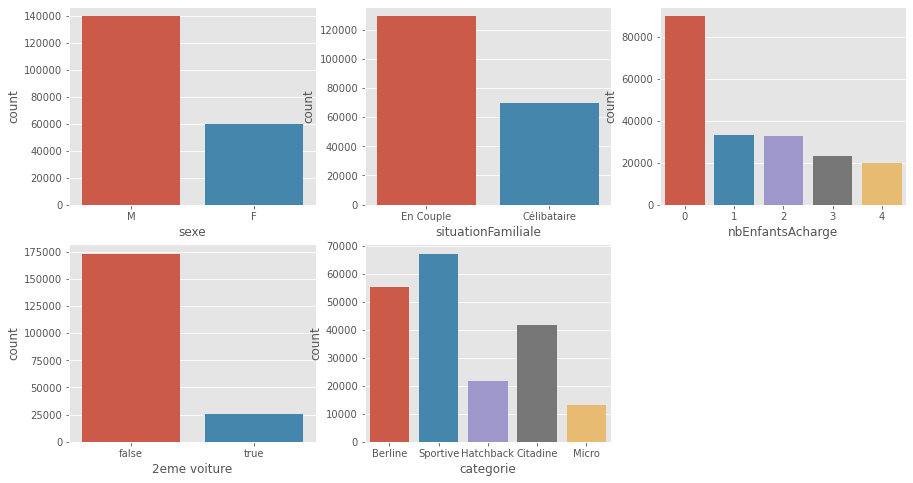

In [63]:
matplotlib.rcParams['figure.figsize'] = (15,8)
_, axs = plt.subplots(ncols = 3, nrows = 2)
sns.countplot(x=final.sexe, ax=axs[0,0])
sns.countplot(x=final.situationFamiliale, ax=axs[0,1])
sns.countplot(x=final.nbEnfantsAcharge, ax=axs[0,2])
sns.countplot(x=final['2eme voiture'], ax=axs[1,0])
sns.countplot(x=final.categorie, ax=axs[1,1])
_.delaxes(axs[1,2])
plt.show()

1) les countplots montrent que les personnes qui sont de sexe masculin sont plus nombreux, mais aussi ceux qui sont en couple ou meme les gens ne possedant pas une deuxieme voiture.
2) plus le nombre d'enfant pris en charge augmente plus il y a moins de personne dans cette catégorie
3) on constate que la voiture la plus acheté est la Sportive suivi par la Berline par contre on trouve en bas du classement la Micro et la Hatchback avec un nombre un peu plus élevé

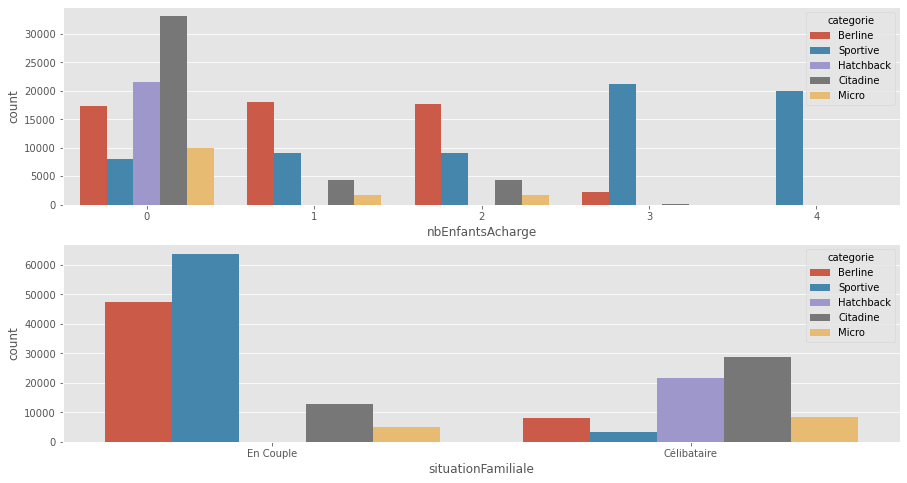

In [64]:
_, axs = plt.subplots(nrows = 2)
sns.countplot(x=final.nbEnfantsAcharge,hue=final.categorie,ax=axs[0])
sns.countplot(x=final.situationFamiliale, hue=final.categorie,ax=axs[1])
plt.show()

1) On constate que la Hatchback est présente chez les personnes Célibataire et chez ceux qui n'ont pas d'enfants ce qui est cohérent
2) les personnes n'ayant pas d'enfant ou ceux qui sont Celibataire ont une tendance à la voiture Citadine
3) Plus le nombre d'enfant augmente plus la berline laisse la place à la sportive qui cette derniere est dominante chez les personnes en couple.

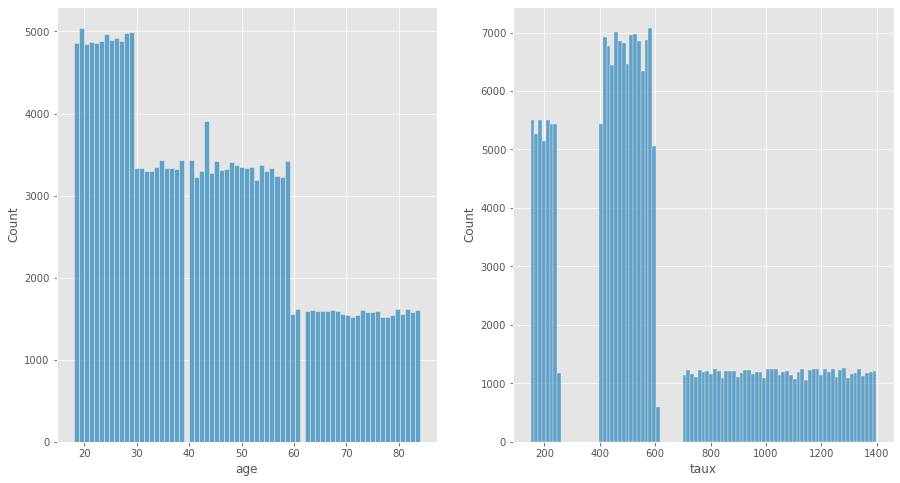

In [65]:
_, axs = plt.subplots(ncols = 2)
sns.histplot(x=final.age, ax=axs[0])
sns.histplot(x=final.taux, ax=axs[1])
plt.show()

On constate que la variation des courbes divise l'age et le taux des personnes en 3 catégories.
On va explore donc les orientations de ces catégories vis à vis des choix des voitures.

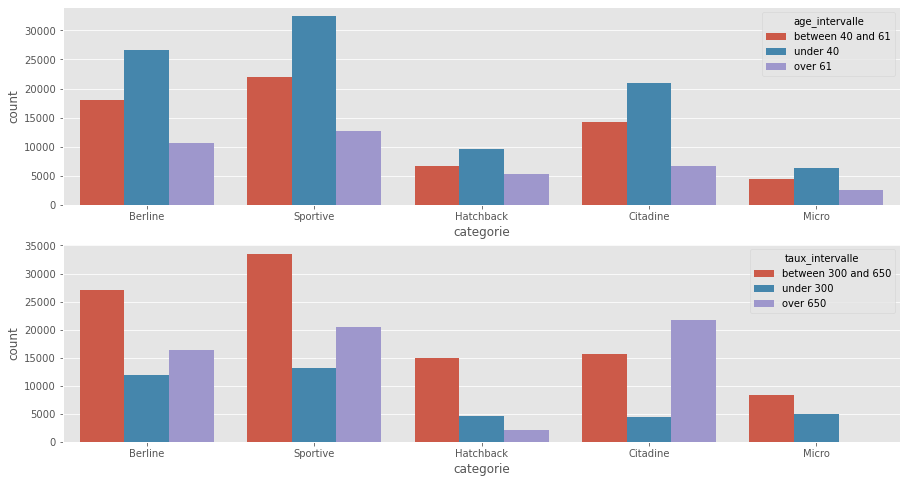

In [66]:
final_temp=final
final_temp.loc[final.age<=40,'age_intervalle']='under 40'
final_temp.loc[(final.age<61)&(final.age>40),'age_intervalle']='between 40 and 61'
final_temp.loc[final.age>=61,'age_intervalle']='over 61'
final_temp.loc[final.taux<=300,'taux_intervalle']='under 300'
final_temp.loc[(final.taux<650)&(final.taux>300),'taux_intervalle']='between 300 and 650'
final_temp.loc[final.taux>=650,'taux_intervalle']='over 650'
_, axs = plt.subplots(nrows = 2)
sns.countplot(x=final_temp.categorie,hue=final_temp.age_intervalle,ax=axs[0])
sns.countplot(x=final_temp.categorie, hue=final_temp.taux_intervalle,ax=axs[1])
plt.show()


1)On constate que les personnes ayant un age inférieur à 40 ans sont ceux qui achete plus de voiture et sont plus orienté à une sportive ou meme une berline, par contre, les personnes agées de plus de 61 ans sont ceux qui achete moins de voiture.
2)le deuxieme plot nous montre que les personnes qui ont un taux entre 300 et 650 sont ceux qui achete plus de voiture et ils sont plus orientés vers une sportive par contre ceux qui ont un taux sous 300 sont ceux qui achetent le moins ce qui est logique, ajoutant à cela, les gens qui ont un taux d'endettement supérieur à 650 n'achetent pas de voiture de type 'Micro'

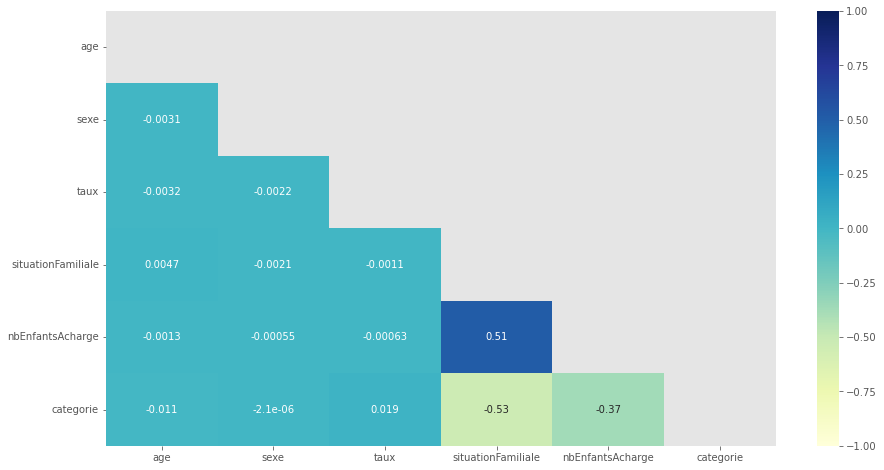

In [67]:
data_corr = final[['age','sexe', 'taux', 'situationFamiliale', 'nbEnfantsAcharge', 'categorie']]\
    .assign(sexe = final.sexe.map({'F': 0, 'M': 1}),situationFamiliale = final.situationFamiliale.map({'Célibataire': 0, 'En Couple': 1}),\
        categorie = final.categorie.map({'Berline': 0, 'Sportive': 1,'Hatchback': 2,'Citadine': 3,'Micro': 4})).corr()
mask = np.triu(np.ones_like(data_corr))
sns.heatmap(data_corr, cmap="YlGnBu", annot=True, mask=mask, vmin=-1, vmax=1)
plt.show()

### 3 Random Forest

In [68]:
final.drop(columns=['age_intervalle','taux_intervalle'],inplace=True,axis=1)
final

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie
0,44,M,476,En Couple,0,false,3176 TS 67,99,Berline
1,20,M,422,En Couple,2,false,3721 QS 49,1,Sportive
2,49,F,221,Célibataire,0,false,9099 UV 26,41,Hatchback
3,57,M,246,Célibataire,0,false,3563 LA 55,113,Citadine
4,58,M,1149,Célibataire,0,false,6963 AX 34,262,Citadine
...,...,...,...,...,...,...,...,...,...
200665,40,F,1000,Célibataire,0,false,8108 RO 11,266,Citadine
200666,21,F,235,Célibataire,0,false,7268 LO 18,118,Citadine
200667,64,M,179,En Couple,0,false,9059 XM 27,4,Sportive
200668,71,M,836,Célibataire,0,false,9945 TN 57,156,Hatchback


In [69]:
final

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie
0,44,M,476,En Couple,0,false,3176 TS 67,99,Berline
1,20,M,422,En Couple,2,false,3721 QS 49,1,Sportive
2,49,F,221,Célibataire,0,false,9099 UV 26,41,Hatchback
3,57,M,246,Célibataire,0,false,3563 LA 55,113,Citadine
4,58,M,1149,Célibataire,0,false,6963 AX 34,262,Citadine
...,...,...,...,...,...,...,...,...,...
200665,40,F,1000,Célibataire,0,false,8108 RO 11,266,Citadine
200666,21,F,235,Célibataire,0,false,7268 LO 18,118,Citadine
200667,64,M,179,En Couple,0,false,9059 XM 27,4,Sportive
200668,71,M,836,Célibataire,0,false,9945 TN 57,156,Hatchback


In [70]:
final_cleaning_2=final.drop('immatriculation',axis=1)
final_cleaning_2['2eme voiture']=final_cleaning_2['2eme voiture'].map({'false':0,'true':1})
final_cleaning_2

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,Unnamed: 0,categorie
0,44,M,476,En Couple,0,0,99,Berline
1,20,M,422,En Couple,2,0,1,Sportive
2,49,F,221,Célibataire,0,0,41,Hatchback
3,57,M,246,Célibataire,0,0,113,Citadine
4,58,M,1149,Célibataire,0,0,262,Citadine
...,...,...,...,...,...,...,...,...
200665,40,F,1000,Célibataire,0,0,266,Citadine
200666,21,F,235,Célibataire,0,0,118,Citadine
200667,64,M,179,En Couple,0,0,4,Sportive
200668,71,M,836,Célibataire,0,0,156,Hatchback


In [71]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [72]:
cols_ohe = ['sexe', 'situationFamiliale']
cols_num = ['age', 'taux','nbEnfantsAcharge', '2eme voiture']
final_cleaning_3=pd.get_dummies(data=final_cleaning_2, columns=cols_ohe)

In [73]:
final_cleaning_3

,age,taux,nbEnfantsAcharge,2eme voiture,Unnamed: 0,categorie,sexe_F,sexe_M,situationFamiliale_Célibataire,situationFamiliale_En Couple
0,44,476,0,0,99,Berline,0,1,0,1
1,20,422,2,0,1,Sportive,0,1,0,1
2,49,221,0,0,41,Hatchback,1,0,1,0
3,57,246,0,0,113,Citadine,0,1,1,0
4,58,1149,0,0,262,Citadine,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
200665,40,1000,0,0,266,Citadine,1,0,1,0
200666,21,235,0,0,118,Citadine,1,0,1,0
200667,64,179,0,0,4,Sportive,0,1,0,1
200668,71,836,0,0,156,Hatchback,0,1,1,0


In [74]:
cols_scale = ['age', 'taux','nbEnfantsAcharge']
scaler = StandardScaler()
final_cleaning_3[cols_scale] = scaler.fit_transform(final_cleaning_3[cols_scale])

In [75]:
final_cleaning_3

,age,taux,nbEnfantsAcharge,2eme voiture,Unnamed: 0,categorie,sexe_F,sexe_M,situationFamiliale_Célibataire,situationFamiliale_En Couple
0,0.016296,-0.395810,-0.899475,0,99,Berline,0,1,0,1
1,-1.302802,-0.557215,0.540801,0,1,Sportive,0,1,0,1
2,0.291108,-1.158000,-0.899475,0,41,Hatchback,1,0,1,0
3,0.730808,-1.083276,-0.899475,0,113,Citadine,0,1,1,0
4,0.785770,1.615774,-0.899475,0,262,Citadine,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
200665,-0.203553,1.170416,-0.899475,0,266,Citadine,1,0,1,0
200666,-1.247839,-1.116155,-0.899475,0,118,Citadine,1,0,1,0
200667,1.115545,-1.283538,-0.899475,0,4,Sportive,0,1,0,1
200668,1.500282,0.680223,-0.899475,0,156,Hatchback,0,1,1,0


In [76]:
display(final_cleaning_3.sample(5))
final_cleaning_3.describe()

,age,taux,nbEnfantsAcharge,2eme voiture,Unnamed: 0,categorie,sexe_F,sexe_M,situationFamiliale_Célibataire,situationFamiliale_En Couple
62998,-0.368441,1.230196,1.260939,0,231,Sportive,1,0,0,1
52857,-0.643253,-0.198537,-0.899475,0,245,Hatchback,1,0,1,0
100624,-1.302802,-1.178923,1.260939,0,128,Sportive,1,0,0,1
153866,-0.863102,2.007331,-0.899475,0,269,Citadine,1,0,1,0
89574,0.016296,0.662289,1.981078,0,231,Sportive,1,0,0,1


,age,taux,nbEnfantsAcharge,2eme voiture,Unnamed: 0,sexe_F,sexe_M,situationFamiliale_Célibataire,situationFamiliale_En Couple
count,1.990390e+05,1.990390e+05,1.990390e+05,199039.000000,199039.000000,199039.000000,199039.000000,199039.000000,199039.000000
mean,-3.255737e-16,7.245714e-18,6.936631e-16,0.130080,153.805104,0.299715,0.700285,0.351524,0.648476
std,1.000003e+00,1.000003e+00,1.000003e+00,0.336392,84.520496,0.458134,0.458134,0.477447,0.477447
min,-1.412726e+00,-1.370218e+00,-8.994755e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.631023e-01,-5.602041e-01,-8.994755e-01,0.000000,77.000000,0.000000,0.000000,0.000000,0.000000
50%,-9.362849e-02,-2.583170e-01,-1.793372e-01,0.000000,165.000000,0.000000,1.000000,0.000000,1.000000
75%,6.758453e-01,6.443554e-01,5.408011e-01,0.000000,233.000000,1.000000,1.000000,1.000000,1.000000
max,2.214793e+00,2.363020e+00,1.981078e+00,1.000000,269.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
final_cleaning_3.categorie.value_counts()

Sportive     67217
Berline      55326
Citadine     41730
Hatchback    21564
Micro        13202
Name: categorie, dtype: int64

In [158]:
X = final_cleaning_3.drop(columns=['categorie','Unnamed: 0'])
y = final_cleaning_3['categorie']

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [142]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=RandomForestClassifier(n_estimators=100,criterion='entropy',max_features='log2',max_depth=11,n_jobs=2,random_state=0), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

Optimal number of features: 5
Selected features: ['taux', 'nbEnfantsAcharge', '2eme voiture', 'situationFamiliale_Célibataire', 'situationFamiliale_En Couple']


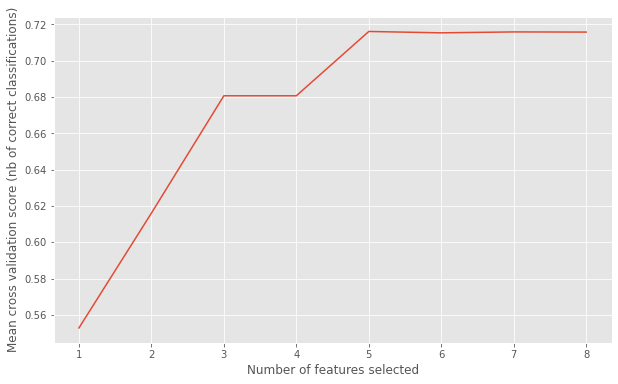

In [143]:
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Mean cross validation score (nb of correct classifications)")
xticks = range(1, X.shape[1]+1)
plt.plot(xticks, rfecv.cv_results_['mean_test_score'])
plt.xticks(xticks)
plt.show()

Le nombre optimal est de 5 selon le RFECV mais selon la courbe on constate une valeur constante(optimale) à partir de 5 features donc on peut garder le meme nombre de features

In [144]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [100],
    'max_features': [ 'sqrt', 'auto'],
    'max_depth' : [11,12,14],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [11, 12, 14],
                         'max_features': ['sqrt', 'auto'],
                         'n_estimators': [100]})

Apres un test de max_features sur ['None','log2','sqrt','auto'] la valeur sqrt a été choisie
et le max_depth a été testé sur un interval entre [1-15] la valeur optimale est '11'

In [145]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [146]:
rf = RandomForestClassifier(n_estimators=100, 
                                criterion='gini',
                                max_features='sqrt',
                                max_depth=11, 
                                n_jobs=2,
                                random_state=0)
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)
# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

Training Accuracy is:  0.7236888380271862
Testing Accuracy is:  0.7177954180064309


## Logistic regression

In [167]:
X = final_cleaning_3.drop(columns=['categorie','Unnamed: 0'])
y = final_cleaning_3['categorie']

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

In [169]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(solver="liblinear").fit(X_train,y_train)
# logreg=LogisticRegression().fit(X_train,y_train)


In [170]:
logreg.score(X_train,y_train)

0.6390275762885368

In [171]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')

print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.638
LogisticRegression average log_loss is 0.771
LogisticRegression average auc is nan


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

# Define the CV method (itérateur différent de celui précédemment utilisé, cf. référence ci-dessus)
rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=2)

log_clf_pipe = Pipeline(steps=[
        ('scale', StandardScaler()), 
        ('clf', LogisticRegression(solver='liblinear'))])

param_grid = {
        'clf__penalty': ['l1', 'l2'],
        'clf__C': np.arange(1e-05, 3, 0.1)}

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=param_grid, refit='Accuracy')

log_clf.fit(X, y)

print('='*20)
print("best estimator: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

gs_results = pd.DataFrame(log_clf.cv_results_)
gs_results.head()

In [115]:
!pip install xgboost


In [117]:
import xgboost as xgb
from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

In [160]:
from sklearn.model_selection import train_test_split
X = final_cleaning_3.drop(columns=['categorie','Unnamed: 0'])
y = final_cleaning_3['categorie']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

In [161]:
X_train

,age,taux,nbEnfantsAcharge,2eme voiture,sexe_F,sexe_M,situationFamiliale_Célibataire,situationFamiliale_En Couple
159269,43,483,0,0,0,1,1,0
109686,63,464,1,0,0,1,0,1
122360,18,518,0,0,0,1,1,0
183807,25,1268,0,0,0,1,1,0
126850,32,445,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
153558,31,459,0,0,1,0,1,0
178415,22,427,0,0,1,0,0,1
118881,20,1154,1,0,1,0,0,1
175111,35,803,2,1,1,0,0,1


In [162]:
from sklearn.preprocessing import LabelEncoder 

lc = LabelEncoder() 

lc = lc.fit(y) 

lc_y_train = lc.transform(y_train)

lc_y_test = lc.transform(y_test)

In [163]:
lc_y_train

array([2, 0, 1, ..., 0, 1, 4])

In [185]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


xgb_model = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(X_train, lc_y_train)


best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# test_probs = clf.predict_proba(test[features])[:,1]

# xgb_model.fit(X_train, lc_y_train)





Fitting 5 folds for each of 1 candidates, totalling 5 fits


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\UserAD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\UserAD\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "c:\Users\UserAD\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1051, in fit
    self._Booster = train(
  File "c:\Users\UserAD\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "c:\Users\UserAD\anaconda3\lib\site-packages\xgboost\training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "c:\Users\UserAD\anaconda3\lib\site-packages\xgboost\core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "c:\Users\UserAD\anaconda3\lib\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [00:10:54] C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:148: label must be in [0,1] for logistic regression


In [165]:
xgb_model.score(X_train,lc_y_train)

0.6326493887710364

D'après les résultats obtenues, on va garder le Random Forest Classifier.

In [190]:
marketing_df=pd.read_csv('Données_communes/Marketing.csv',encoding='ISO-8859-1')
cols_ohe=['sexe','situationFamiliale']
cols_num=['age','taux','nbEnfantsAcharge','2eme voiture']
final_marketing=pd.get_dummies(data=marketing_df,columns=cols_ohe)
cols_scale=['age','taux','nbEnfantsAcharge']
scaler=StandardScaler()
final_marketing[cols_scale]=scaler.fit_transform(final_marketing[cols_scale])
final_marketing['2eme voiture']=final_marketing['2eme voiture'].map({False:0,True:1})
prediction_test=rf.predict(X=final_marketing)
prediction_test

array(['Citadine', 'Hatchback', 'Hatchback', 'Micro', 'Berline',
       'Berline', 'Berline', 'Citadine', 'Hatchback', 'Berline',
       'Berline', 'Hatchback', 'Citadine', 'Berline', 'Micro', 'Micro',
       'Berline', 'Micro', 'Hatchback', 'Micro'], dtype=object)